# **<u>Project</u>: <u>EDA on MovieLens Data<u>**

## **<u>About The Data<u>:**
MovieLens data sets were collected by the GroupLens Research Project at the University of Minnesota.<br>
This data set consists of:<br>
    * 100,000 ratings (1-5) from 943 users on 1682 movies. <br>
    * Each user has rated at least 20 movies. <br>
    * Simple demographic info for the users (age, gender, occupation, zip)<br>


**<u>Objective<u>:<br>**
    Demonstrate your skill in python for data analysis.<br>
**<u>Steps and tasks<u>:**<br>
* You will need to import 3 files from the folder as data frames into your Jupyter notebook
    * u.data
    * u.item
    * u.user
* Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames
* Visualize how popularity of Genres has changed over the years. From the graph one should be able to see for any given year, movies of which genre got released the most.
* Display the top 25 movies by average rating, as a list/series/dataframe.
Note:- Consider only the movies which received atleast a 100 ratings
* Verify the following statements (no need of doing a statistical test. Compare absolute numbers):
    * Men watch more drama than women
    * Men watch more Romance than women
    * Women watch more Sci-Fi than men
* References:
    * https://movielens.org/

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
pd.pandas.set_option("display.max_columns", None) # to see all the columns

### <u>**About u.data<u> :**
>The full u data set, 100000 ratings by 943 users on 1682 items.<br>
Each user has rated at least 20 movies.  Users and items are<br>
numbered consecutively from 1.  The data is randomly<br>
ordered. This is a tab separated list of <br>
user id | item id | rating | timestamp. <br>
The time stamps are unix seconds since 1/1/1970 UTC <br>  

In [18]:
data_col_names = "User_ID | Item_ID | Ratings | TimeStamp".replace(" ", "").split('|')
data_col_names

['User_ID', 'Item_ID', 'Ratings', 'TimeStamp']

In [19]:
data = pd.read_csv(os.getcwd()+"\\ml-100k\\u.data", sep='\t', names = data_col_names) 
data.head()

,User_ID,Item_ID,Ratings,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [20]:
data.shape

(100000, 4)

In [21]:
data.dtypes

User_ID      int64
Item_ID      int64
Ratings      int64
TimeStamp    int64
dtype: object

In [22]:
# from datetime import datetime
# print(datetime.fromtimestamp(881250949).date())

In [23]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'], unit = 's')
data['TimeStamp'][0]

Timestamp('1997-12-04 15:55:49')

In [24]:
data.dtypes

User_ID               int64
Item_ID               int64
Ratings               int64
TimeStamp    datetime64[ns]
dtype: object

In [25]:
print(data['TimeStamp'][0].time())
print(data['TimeStamp'][0].date())
print(data['TimeStamp'][0].year)
print(data['TimeStamp'][0].month)
print(data['TimeStamp'][0].day)
print(data['TimeStamp'][0].hour)

15:55:49
1997-12-04
1997
12
4
15


### <u>**About u.user dataset<u>:**
>Demographic information about the users; this is a tab separated list of<br>
user id | age | gender | occupation | zip code<br>
The user ids are the ones used in the u.data data set.

In [26]:
user_col_names = "User_ID | Age | Gender | Occupation | Zip_Code".replace(" ", "").split("|")
user_col_names

['User_ID', 'Age', 'Gender', 'Occupation', 'Zip_Code']

In [27]:
user = pd.read_csv(os.getcwd()+"\\ml-100k\\u.user", sep='|', names=user_col_names)
user.head()

,User_ID,Age,Gender,Occupation,Zip_Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [28]:
user.shape

(943, 5)

In [29]:
user.dtypes

User_ID        int64
Age            int64
Gender        object
Occupation    object
Zip_Code      object
dtype: object

In [30]:
user['Occupation'] = user['Occupation'].str.capitalize()

In [31]:
user.head()

,User_ID,Age,Gender,Occupation,Zip_Code
0,1,24,M,Technician,85711
1,2,53,F,Other,94043
2,3,23,M,Writer,32067
3,4,24,M,Technician,43537
4,5,33,F,Other,15213


### <u>**About u.item dataset<u>:**
>Information about the items (movies); this is a tab separated list of<br>
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |<br>
              The last 19 fields are the genres, ***a 1 indicates the movie<br>
              is of that genre, a 0 indicates it is not; movies can be in<br>
              several genres at once.***<br>
              *The movie ids are the ones used in the u.data data set.*<br>

In [32]:
# df2 = pd.read_csv(os.getcwd()+"\\ml-100k\\u.item")
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 76620: invalid continuation byte

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 76620: invalid continuation byte

## **How to resolve a UnicodeDecodeError for a CSV file?**

https://www.kaggle.com/code/paultimothymooney/how-to-resolve-a-unicodedecodeerror-for-a-csv-file/notebook

In [33]:
import chardet
with open(os.getcwd()+"\\ml-100k\\u.item", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [34]:
item_col_names = "Movie_ID | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western | ".replace(" | ", ",").split(",")
item_col_names = [i.title() for i in item_col_names]
item_col_names[:5]

['Movie_Id', 'Movie Title', 'Release Date', 'Video Release Date', 'Imdb Url']

In [35]:
items = pd.read_csv(os.getcwd()+"\\ml-100k\\u.item", sep='|', encoding = "ISO-8859-1", names = item_col_names)
items.head()

,Movie_Id,Movie Title,Release Date,Video Release Date,Imdb Url,Unknown,Action,Adventure,Animation,Children'S,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,NaN


In [36]:
items.shape

(1682, 25)

In [37]:
items.dtypes

Movie_Id                int64
Movie Title            object
Release Date           object
Video Release Date    float64
Imdb Url               object
Unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Children'S              int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
                      float64
dtype: object

In [38]:
items.isnull().sum()

Movie_Id                 0
Movie Title              0
Release Date             1
Video Release Date    1682
Imdb Url                 3
Unknown                  0
Action                   0
Adventure                0
Animation                0
Children'S               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
                      1682
dtype: int64

In [39]:
# Droping Unecessary colums:
items.drop(['Video Release Date', 'Imdb Url'], axis=1, inplace=True)

In [40]:
# Converting Release Date to datetime format
items['Release Date'] = pd.to_datetime(items['Release Date']).dt.date

In [41]:
items['Release Date']

0       1995-01-01
1       1995-01-01
2       1995-01-01
3       1995-01-01
4       1995-01-01
           ...    
1677    1998-02-06
1678    1998-02-06
1679    1998-01-01
1680    1994-01-01
1681    1996-03-08
Name: Release Date, Length: 1682, dtype: object

In [42]:
# items[items['Release Date'].isnull()][['Release Date']]

In [43]:
items.drop('', axis=1, inplace=True)

In [44]:
items.rename(columns={"Children's":"Children","Release Date":'Release_Date','Movie Title':'Movie_Title'}, inplace=True)

In [45]:
items.columns

Index(['Movie_Id', 'Movie_Title', 'Release_Date', 'Unknown', 'Action',
       'Adventure', 'Animation', 'Children'S', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [46]:
items['Release_Date'] = pd.to_datetime(items['Release_Date'])

In [47]:
items['Release_Date'].dt.year

0       1995.0
1       1995.0
2       1995.0
3       1995.0
4       1995.0
         ...  
1677    1998.0
1678    1998.0
1679    1998.0
1680    1994.0
1681    1996.0
Name: Release_Date, Length: 1682, dtype: float64

In [48]:
items['Release_Year'] = items['Release_Date'].dt.year
# Same Thing => pd.DatetimeIndex(items['Release_Date']).year

## **Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames**

In [49]:
data.columns

Index(['User_ID', 'Item_ID', 'Ratings', 'TimeStamp'], dtype='object')

In [50]:
user.columns

Index(['User_ID', 'Age', 'Gender', 'Occupation', 'Zip_Code'], dtype='object')

In [51]:
items.columns

Index(['Movie_Id', 'Movie_Title', 'Release_Date', 'Unknown', 'Action',
       'Adventure', 'Animation', 'Children'S', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'Release_Year'],
      dtype='object')

### *Ratings*

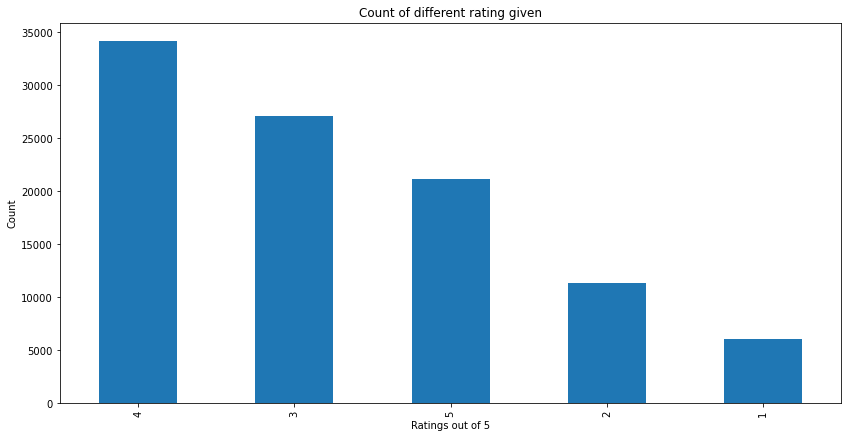

In [52]:
data['Ratings'].value_counts().plot(kind = 'bar', figsize=(14,7))
plt.xlabel("Ratings out of 5")
plt.ylabel("Count")
plt.title("Count of different rating given");

Most people give 4 or 3 star rating to movies 

### *Age*

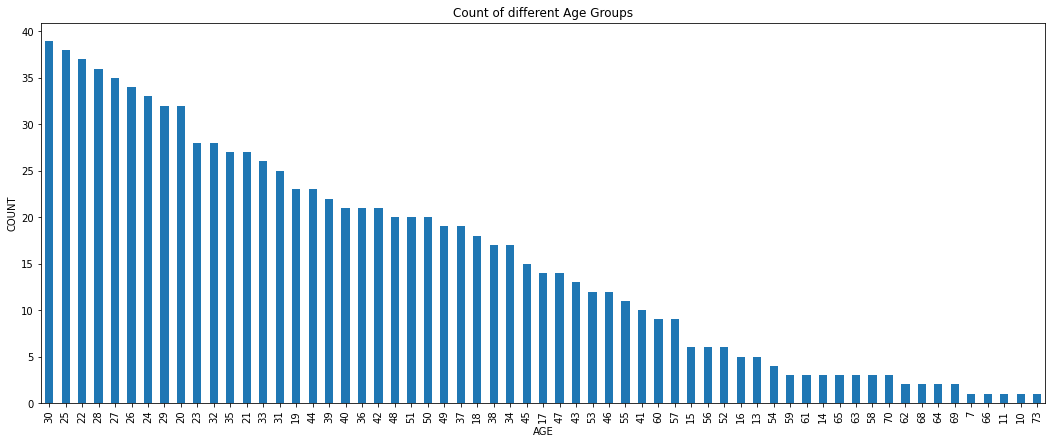

In [53]:
user['Age'].value_counts().plot(kind = 'bar', figsize=(18,7))
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.title("Count of different Age Groups");

20-30 years old age groups seems to watch most movies, highest being of age 30

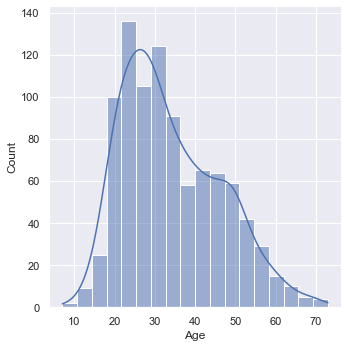

In [54]:
sns.set()
sns.displot(user.Age, kde=True)
plt.show();

### *Release Date*

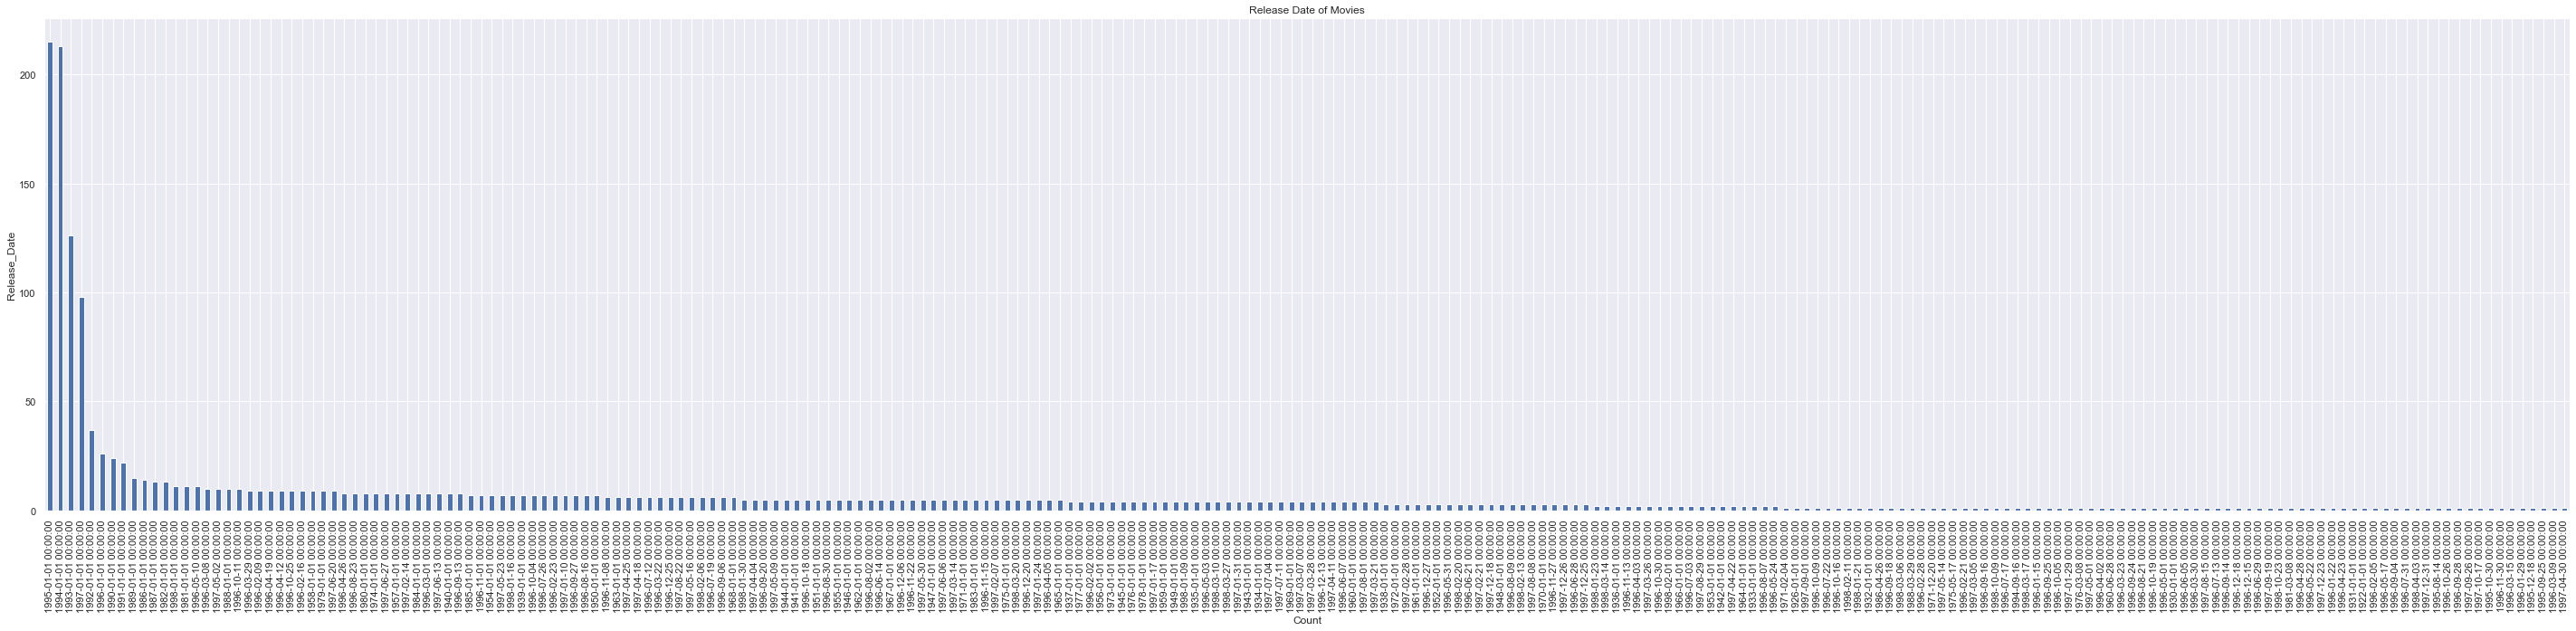

In [56]:
items['Release_Date'].value_counts().plot(kind = 'bar', figsize=(50,10))
plt.ylabel("Release_Date")
plt.xlabel("Count")
plt.title("Release Date of Movies");

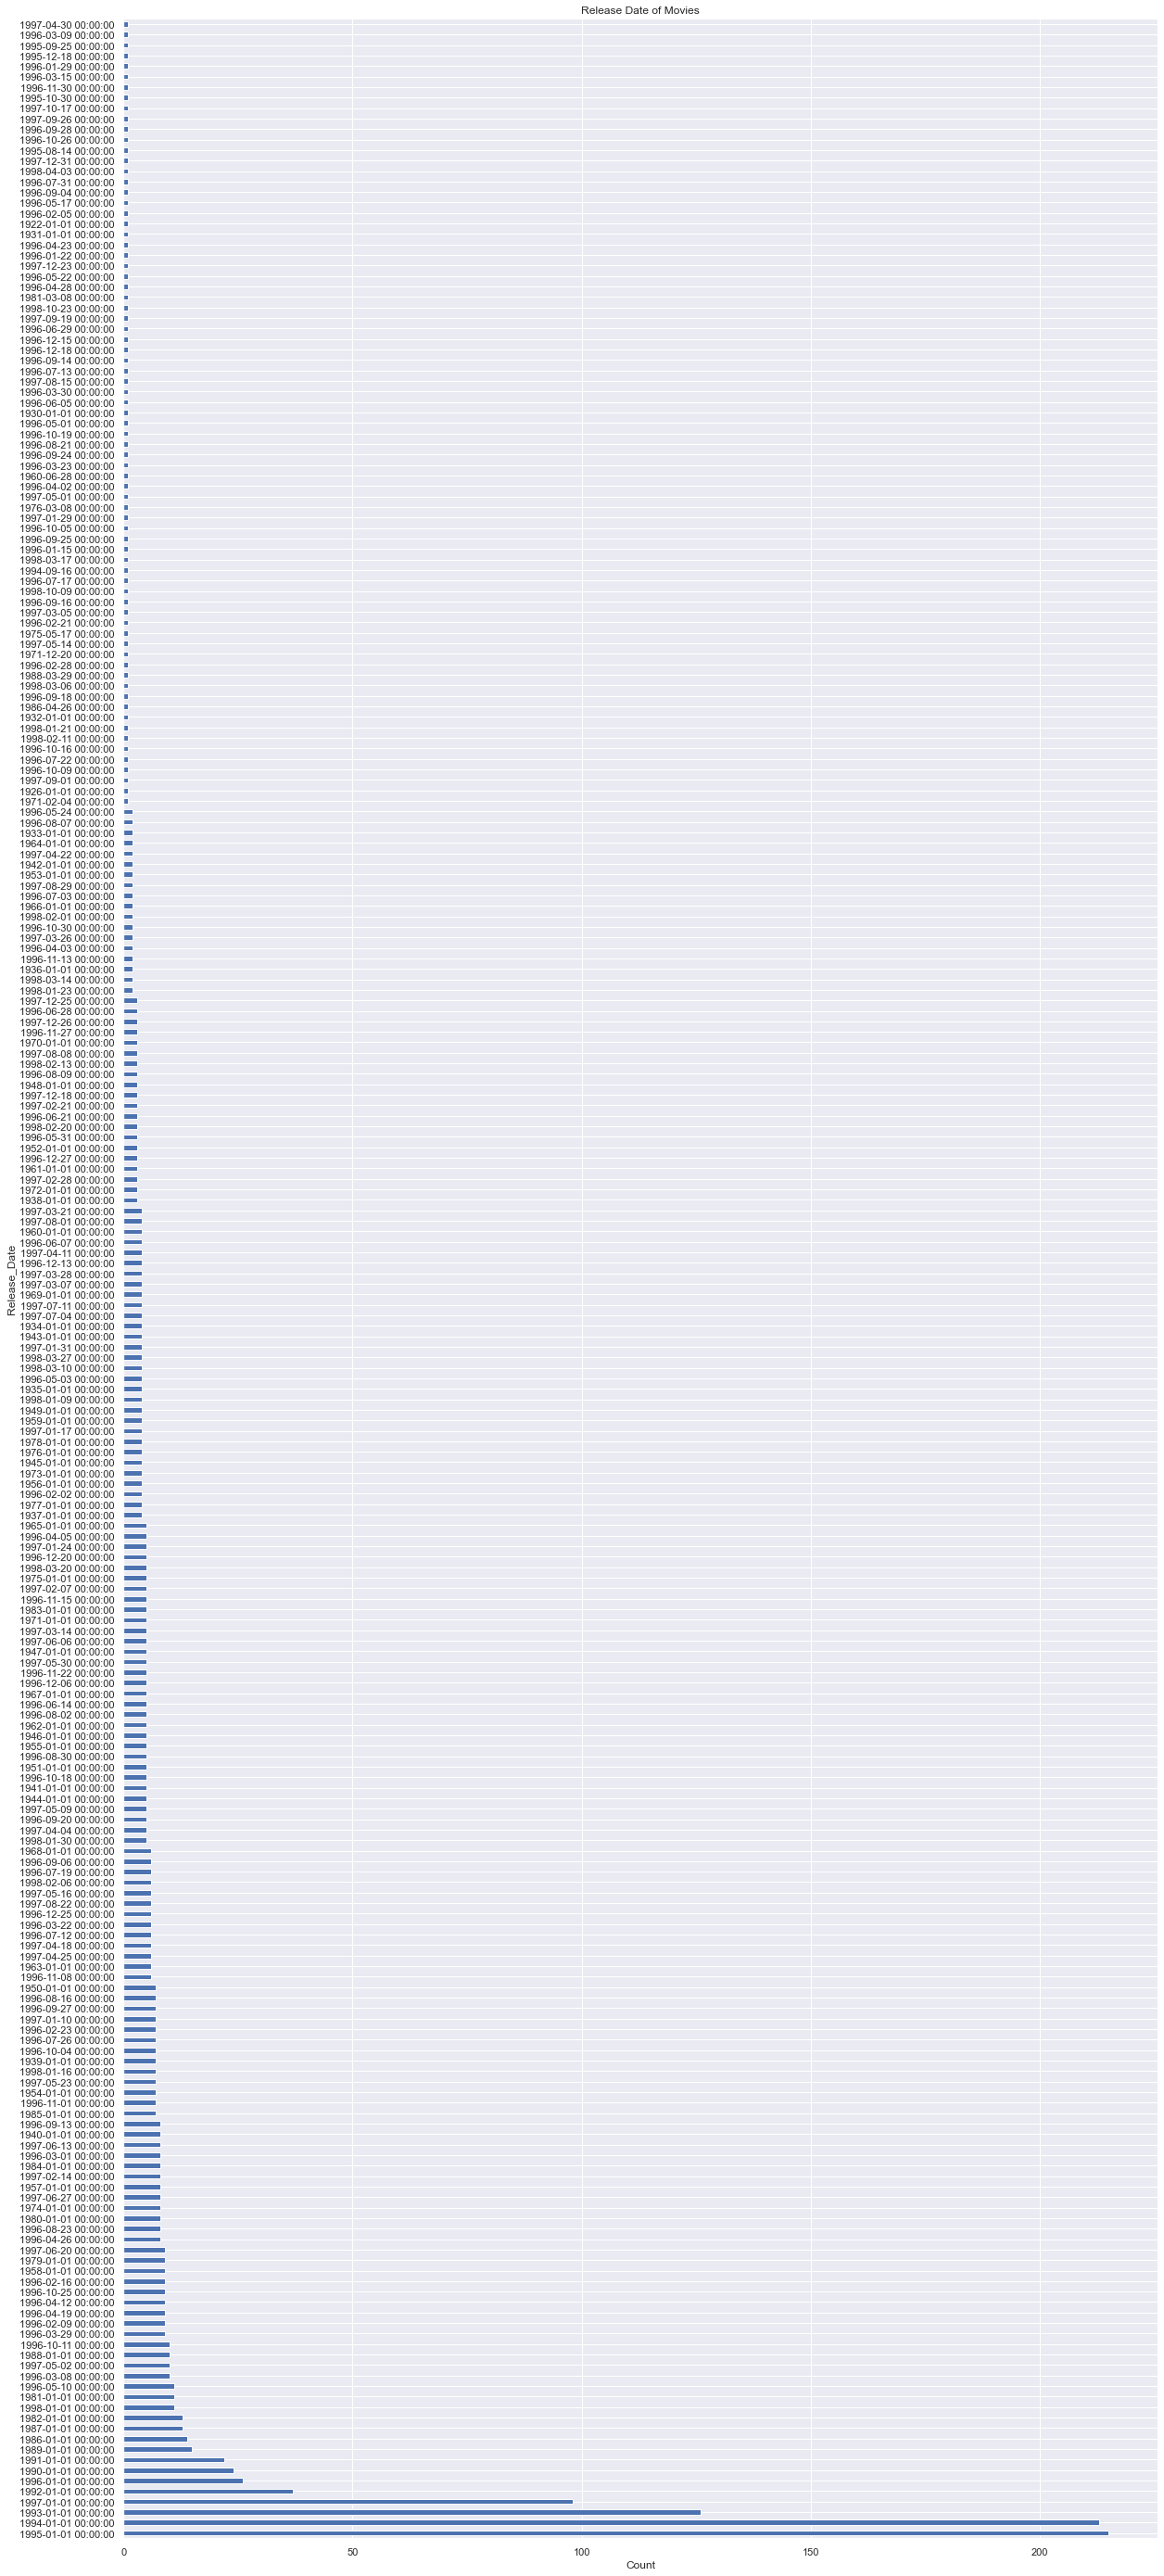

In [57]:
items['Release_Date'].value_counts().plot(kind = 'barh', figsize=(20,50))
plt.ylabel("Release_Date")
plt.xlabel("Count")
plt.title("Release Date of Movies");

We can see most movies are released in high numbers on Jan - 01 but it's an exponential decrease

**Distribution of movies wrto Release Year**

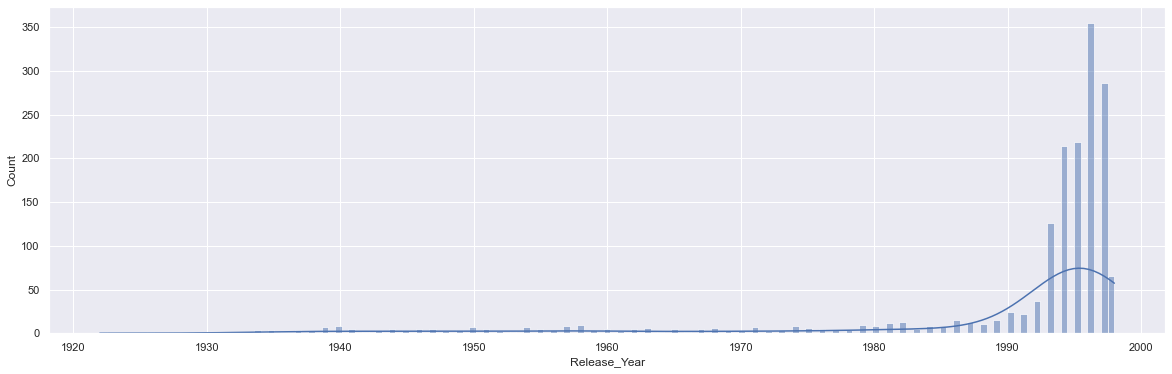

In [58]:
plt.figure(figsize=(20,6))
sns.histplot(items.Release_Year, kde=True)
plt.show();

In [59]:
# plt.figure(figsize = (20,50))
# sns.countplot(y=items['Release Date'], data=items, orient='v');

### *Gender*

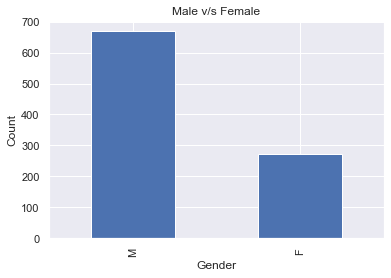

In [60]:
user['Gender'].value_counts().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Gender")
plt.title("Male v/s Female");

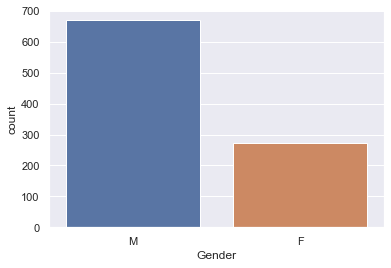

In [61]:
sns.countplot(x=user.Gender);

Male watch more movies.

### *Occupation*

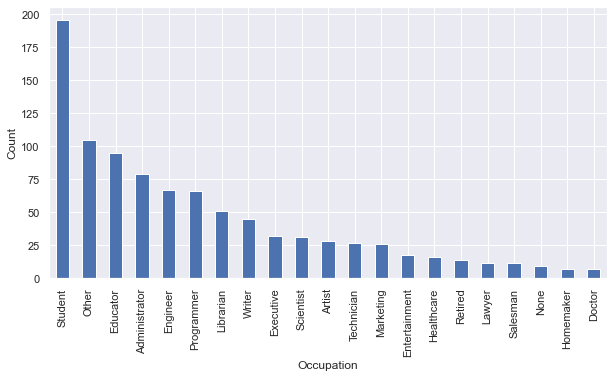

In [62]:
user['Occupation'].value_counts().plot(kind = 'bar', figsize=(10,5))
plt.xlabel("Occupation");
plt.ylabel('Count');

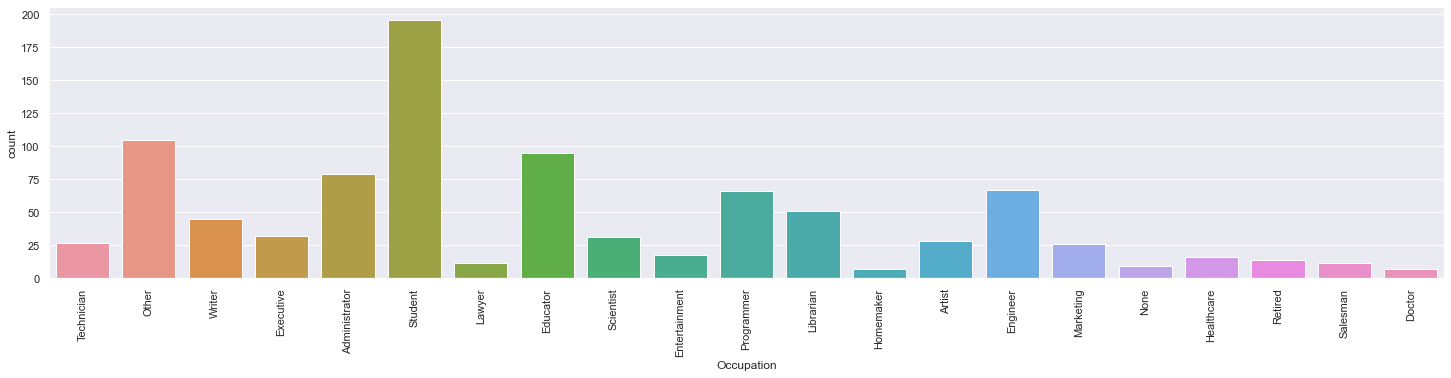

In [63]:
plt.figure(figsize=(25,5))
sns.countplot(x=user.Occupation)
plt.xticks(rotation=90) # To make the xlables vertical.
plt.show()

Students watch more movies whereas some professionals like doctors,lawyers and homemaakers watch less. 

## **Visualize how popularity of Genres has changed over the years. From the graph one should be able to see for any given year, movies of which genre got released the most.**

In [64]:
genre_by_year = items.groupby('Release_Year').sum().drop('Movie_Id', axis=1).T
genre_by_year

Release_Year,1922.0,1926.0,1930.0,1931.0,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,1938.0,1939.0,1940.0,1941.0,1942.0,1943.0,1944.0,1945.0,1946.0,1947.0,1948.0,1949.0,1950.0,1951.0,1952.0,1953.0,1954.0,1955.0,1956.0,1957.0,1958.0,1959.0,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0
Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,1,2,2,6,1,1,2,0,5,3,2,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,1,1,0,1,1,0,0,0,0,1,0,0,2,0,0,1,2,0,2,0,1,1,4,1,0,1,0,3,2,2,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,1,0,2,0,0,1,2,1,4,6,9,3,0
Children'S,0,0,0,0,0,0,0,0,0,1,0,2,2,1,0,0,0,1,0,0,0,1,2,1,0,0,1,0,0,1,0,1,2,1,0,1,1,1,0,0,1,1,1,2,0,0,1,2,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,1,2,3,0,1,1,1,0,0,0,0,0,1,0,1,2,2,1,1,2,1,3,2,0,0,1,1,3,0,1,0,2,1,3,1,2,4,1,0,1,2,3,3,2,3,1,1,3,3,8,3,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,1,5,0,3,2,1,0,1,3,1,0,2,3,2,0,0,3,3,2,5,4,1,2,2,2,1,0,1,1,5,2,0,1,1,2,2,2,1,2,0,1,3,3,2,6,1,5,3,8,5,3,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,3,3,6,4,1


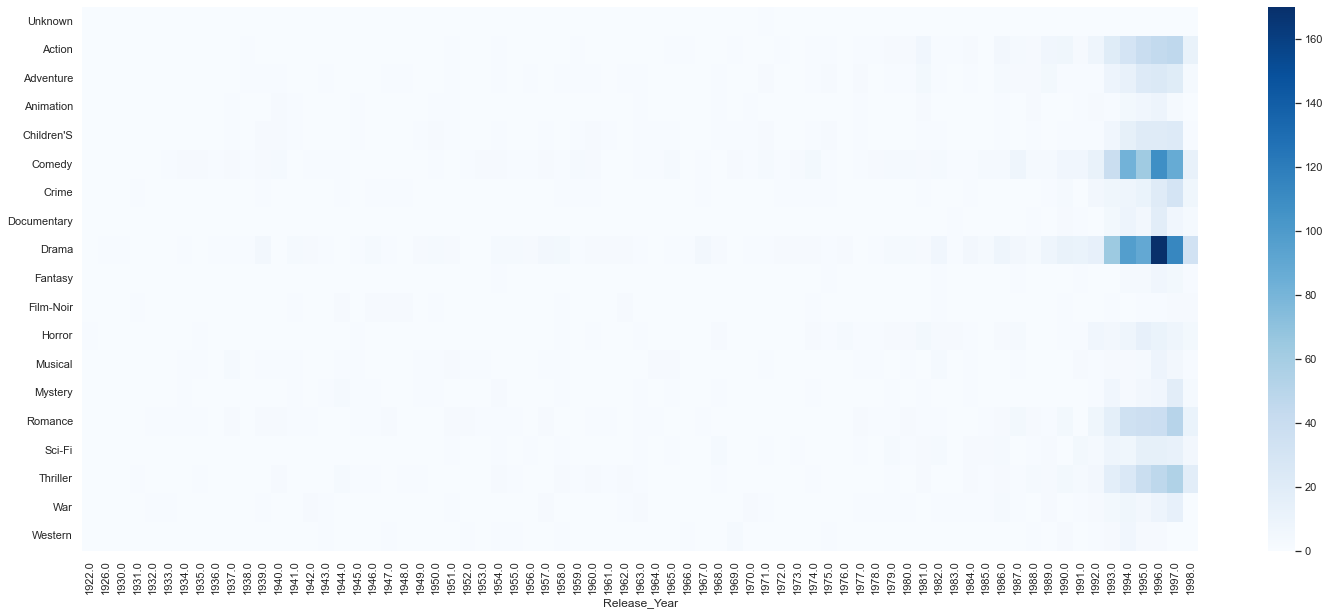

In [65]:
plt.figure(figsize=(25,10))
sns.heatmap(genre_by_year, cmap='Blues');

## **Display the top 25 movies by average rating, as a list/series/dataframe.**
>Note:- Consider only the movies which received atleast a 100 ratings i.e minimum 100 users have rated that movie

In [66]:
items.columns

Index(['Movie_Id', 'Movie_Title', 'Release_Date', 'Unknown', 'Action',
       'Adventure', 'Animation', 'Children'S', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'Release_Year'],
      dtype='object')

In [67]:
data.columns

Index(['User_ID', 'Item_ID', 'Ratings', 'TimeStamp'], dtype='object')

In [68]:
items.head()

,Movie_Id,Movie_Title,Release_Date,Unknown,Action,Adventure,Animation,Children'S,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Release_Year
0,1,Toy Story (1995),1995-01-01,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),1995-01-01,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),1995-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),1995-01-01,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),1995-01-01,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995.0


In [69]:
data.head()

,User_ID,Item_ID,Ratings,TimeStamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [70]:
items[items['Movie_Id']==242]

,Movie_Id,Movie_Title,Release_Date,Unknown,Action,Adventure,Animation,Children'S,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Release_Year
241,242,Kolya (1996),1997-01-24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1997.0


In [71]:
# getting the count of number of users who rated the movies by counting User_ID and grouping it with Movie_ID/Item_ID
rating_count = data.groupby('Item_ID').count()
# filtering movies with more than 100 ratings
rating_count = rating_count[rating_count['User_ID']>100]
# getting the filtered movies ID/Item_ID
movie_id = rating_count.index
# getting ratings of these movies
movies100 = data.loc[data.Item_ID.isin(movie_id)]
# calculating the average rating and sorting
movies100 = movies100.groupby('Item_ID').mean().sort_values(ascending = False, by='Ratings')
#getting the top 25 movies
top_25_movies = movies100.iloc[:25,1].to_frame()
top_25_movies_Index = top_25_movies.index

In [72]:
top_25_movies

,Ratings
Item_ID,
408,4.491071
318,4.466443
169,4.466102
483,4.456790
64,4.445230
603,4.387560
12,4.385768
50,4.358491
178,4.344000


In [73]:
top_25_movies_Index

Int64Index([408, 318, 169, 483,  64, 603,  12,  50, 178, 134, 427, 357,  98,
            480, 127, 285, 272, 657, 474, 174, 479, 313, 511, 484, 172],
           dtype='int64', name='Item_ID')

In [74]:
#top 25 movies names
m = items.loc[items.Movie_Id.isin(top_25_movies_Index)].set_index('Movie_Id')

In [75]:
top_25_movies['Movie-Title'] = m.Movie_Title
top_25_movies.reset_index(inplace=True)

In [76]:
top_25_movies

,Item_ID,Ratings,Movie-Title
0,408,4.491071,"Close Shave, A (1995)"
1,318,4.466443,Schindler's List (1993)
2,169,4.466102,"Wrong Trousers, The (1993)"
3,483,4.456790,Casablanca (1942)
4,64,4.445230,"Shawshank Redemption, The (1994)"
5,603,4.387560,Rear Window (1954)
6,12,4.385768,"Usual Suspects, The (1995)"
7,50,4.358491,Star Wars (1977)
8,178,4.344000,12 Angry Men (1957)
9,134,4.292929,Citizen Kane (1941)


## **Verify the following statements**
* Men watch more drama than women
* Men watch more Romance than women
* Women watch more Sci-Fi than men

In [77]:
male_id = user[user["Gender"]=='M']['User_ID']
female_id = user[user["Gender"]=='F']['User_ID']

In [78]:
male_df = items.loc[items.Movie_Id.isin(male_id)]
female_df = items.loc[items.Movie_Id.isin(female_id)]

In [79]:
male_df[male_df['Romance']==1].shape[0]

108

In [80]:
female_df[female_df['Romance']==1].shape[0]

48

Male watch more Romance Movies

In [81]:
male_df[male_df['Drama']==1].shape[0]

256

In [82]:
female_df[female_df['Drama']==1].shape[0]

108

Men watch more Drama than Women

In [83]:
male_df[male_df['Sci-Fi']==1].shape[0]

60

In [84]:
female_df[female_df['Sci-Fi']==1].shape[0]

25

Men watch more Sci-Fi than Women